# 예측 애널리틱스 - 인공신경망 실습


# 1. 모듈 불러오기

In [45]:
# 실습용 데이터 패키지
from torchvision.datasets import FashionMNIST

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

#기계학습 모델 패키지
from sklearn.neural_network import MLPClassifier

#시각화 패키지
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family = 'Malgun Gothic') # 코랩에서도 한글폰트 출력이 되는지 확인 필요.

#예측 평가지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix

#예측 결과 시각화 커스텀 함수
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
              horizontalalignment = "center", 
              color = "red" if cm[i, j] > thresh else "black", fontsize = 30)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#기타 
import warnings, itertools, time
warnings.filterwarnings(action = 'ignore')


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 2. 데이터 불러오기, 로더 만들기

In [41]:
# Fashon_MNIST 데이터를 저장 할 디렉토리
download_root = './'

#데이터 스케일링을 위한 요소
fashion_mnist_transform = transforms.Compose([
  transforms.ToTensor(), #데이터 형태를 파이토치에 맞는 형태로 변환하여줌.(텐서?)
  transforms.Normalize((0.0),(1.0)) #feature 들의 평균, 표쥰편차를 각각 0, 1로 스케일링
])

#FashonMNIST 데이터셋 다운로드(훈련)
dataset = FashionMNIST(download_root, transform = fashion_mnist_transform,train = True, download = True)

#FashonMNIST 데이터셋 다운로드(테스트)
test_dataset = FashionMNIST(download_root, transform = fashion_mnist_transform,train = False, download = True)

#train데이터를 train, validation으로 분리
train_dataset, valid_dataset = torch.utils.data.random_split(dataset,[50000,10000])

#3. sklearn을 이용한 신경망 데이터 학습

## 3-1. 모델 구축


In [28]:
model = MLPClassifier(random_state= 0, hidden_layer_sizes=(300,150),activation = 'relu', solver = 'adam',
                      batch_size= 100, learning_rate= 'constant', learning_rate_init = 0.001, verbose = True, early_stopping=True,
                      validation_fraction=10000/60000, n_iter_no_change= 5)

*** MLPCLassifier 하이퍼파라미터 정리***
* random_state: 랜덤 시드값 고정  
* learning_rate, learning_rate_init: 학습률 설정. constant는 learning rate 값을 고정.
* verbose: 진행중인 메세지를 출력할지 안할지? defalut = False.
* early_stopping, n_iter_no_change: 학습이 더이상 진행되지 않을 경우 학습 중간에 멈추는 여부.  n번 이상 개선되지 않을 경우 학습이 종료. defalut = 10
* solver: 경사하강법 알고리즘을 지정. 일단 아담이면 대부분 해결.

## 3-2 모델 학습

In [29]:
start = time.time() #모델 학습시간 저장
model.fit(dataset.data.numpy().reshape(60000,-1),dataset.targets.numpy()) #모델 학습
print("time:", time.time() -  start)

Iteration 1, loss = 3.11175442
Validation score: 0.814400
Iteration 2, loss = 0.77383503
Validation score: 0.809700
Iteration 3, loss = 0.51327096
Validation score: 0.818500
Iteration 4, loss = 0.43138072
Validation score: 0.844100
Iteration 5, loss = 0.39518493
Validation score: 0.854300
Iteration 6, loss = 0.37512109
Validation score: 0.853500
Iteration 7, loss = 0.36352349
Validation score: 0.861800
Iteration 8, loss = 0.35724475
Validation score: 0.862400
Iteration 9, loss = 0.35734297
Validation score: 0.867100
Iteration 10, loss = 0.34922536
Validation score: 0.852600
Iteration 11, loss = 0.34549605
Validation score: 0.871500
Iteration 12, loss = 0.33677107
Validation score: 0.868000
Iteration 13, loss = 0.32889928
Validation score: 0.851800
Iteration 14, loss = 0.32122494
Validation score: 0.872300
Iteration 15, loss = 0.32435066
Validation score: 0.875800
Iteration 16, loss = 0.31546810
Validation score: 0.868200
Iteration 17, loss = 0.30555749
Validation score: 0.851300
Iterat

## 3-2 학습 현황 확인 및 예측 결과 출력


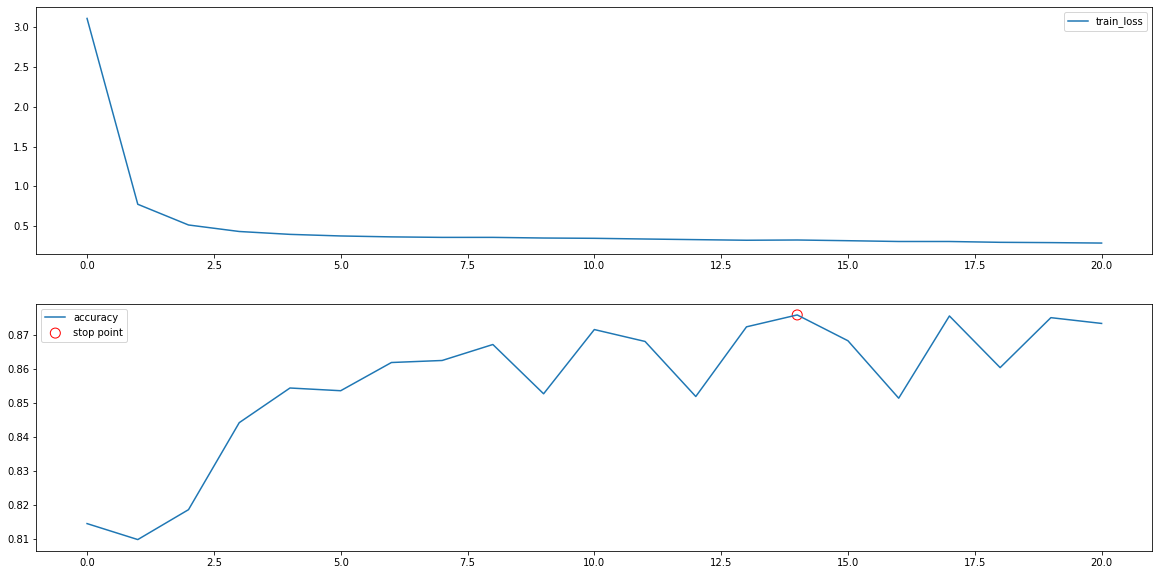

In [38]:
# model의 training loss
train_loss = model.loss_curve_

#그래프 생성
f, axs = plt.subplots(2,1,figsize = (20,10))

#학습 로스 변동 관찰하기

axs[0].plot(train_loss, label = 'train_loss')
axs[0].legend() # 범례 설정

#검증용 데이터에 관한 accuracy 변동 확인하기 
# 가장 acc 가 높았던 포인트를 체크
axs[1].plot(model.validation_scores_, label = 'accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_), s=100, facecolors = 'none',edgecolors = 'red',
               label = 'stop point')

axs[1].legend() # 범례 설정

plt.show()


In [42]:
# 예측 acc 확인하기

train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000,-1)),y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도 :{train_accuracy:.3f}",f"테스트용 데이터셋 정확도:{test_accuracy:.3f}",sep='  l  ')

훈련 데이터셋 정확도 :0.894  l  테스트용 데이터셋 정확도:0.865


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


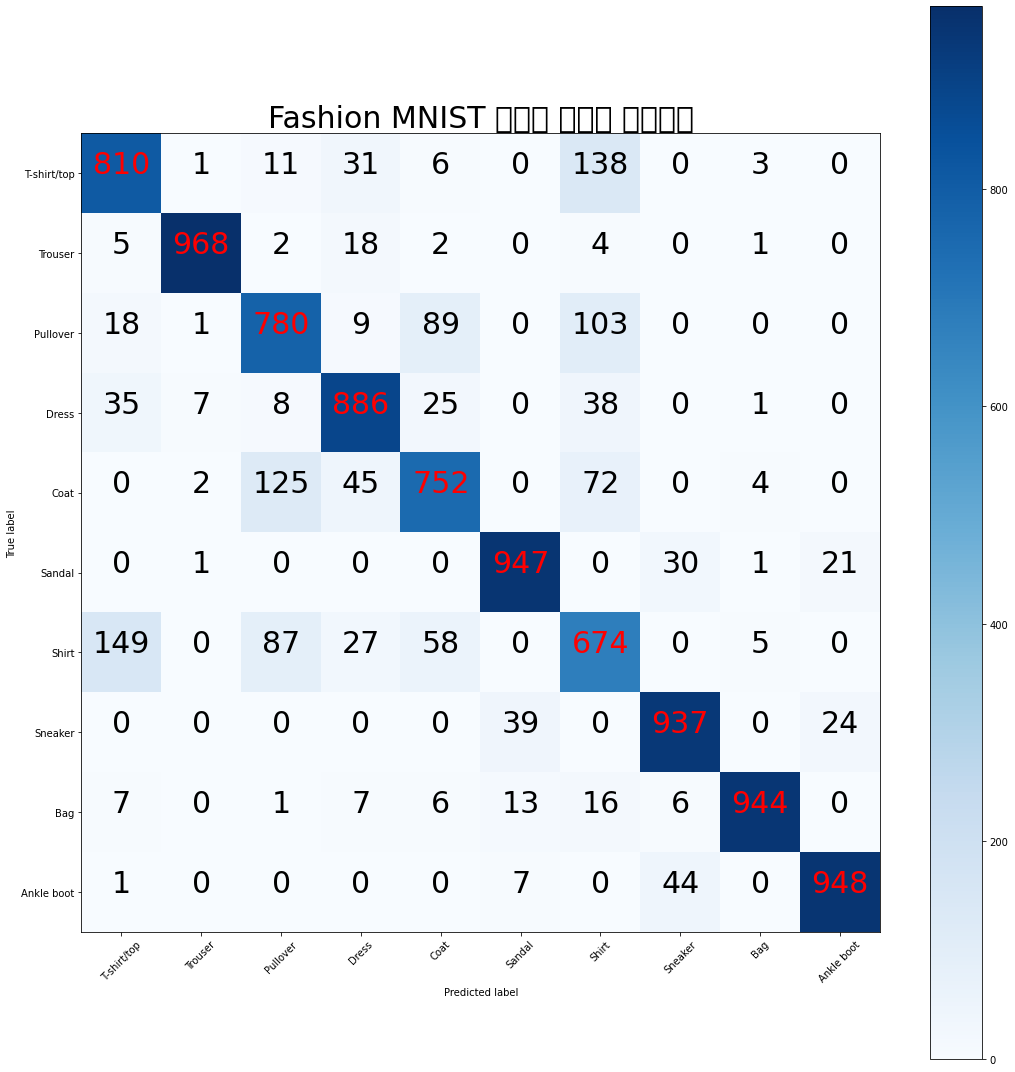

In [46]:
confusion_matrix_= confusion_matrix(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),y_true=test_dataset.targets.numpy())
plot_confusion_matrix(cm= confusion_matrix_,classes=dataset.classes, title = 'Fashion MNIST 테스팅 데이터 혼동행렬')

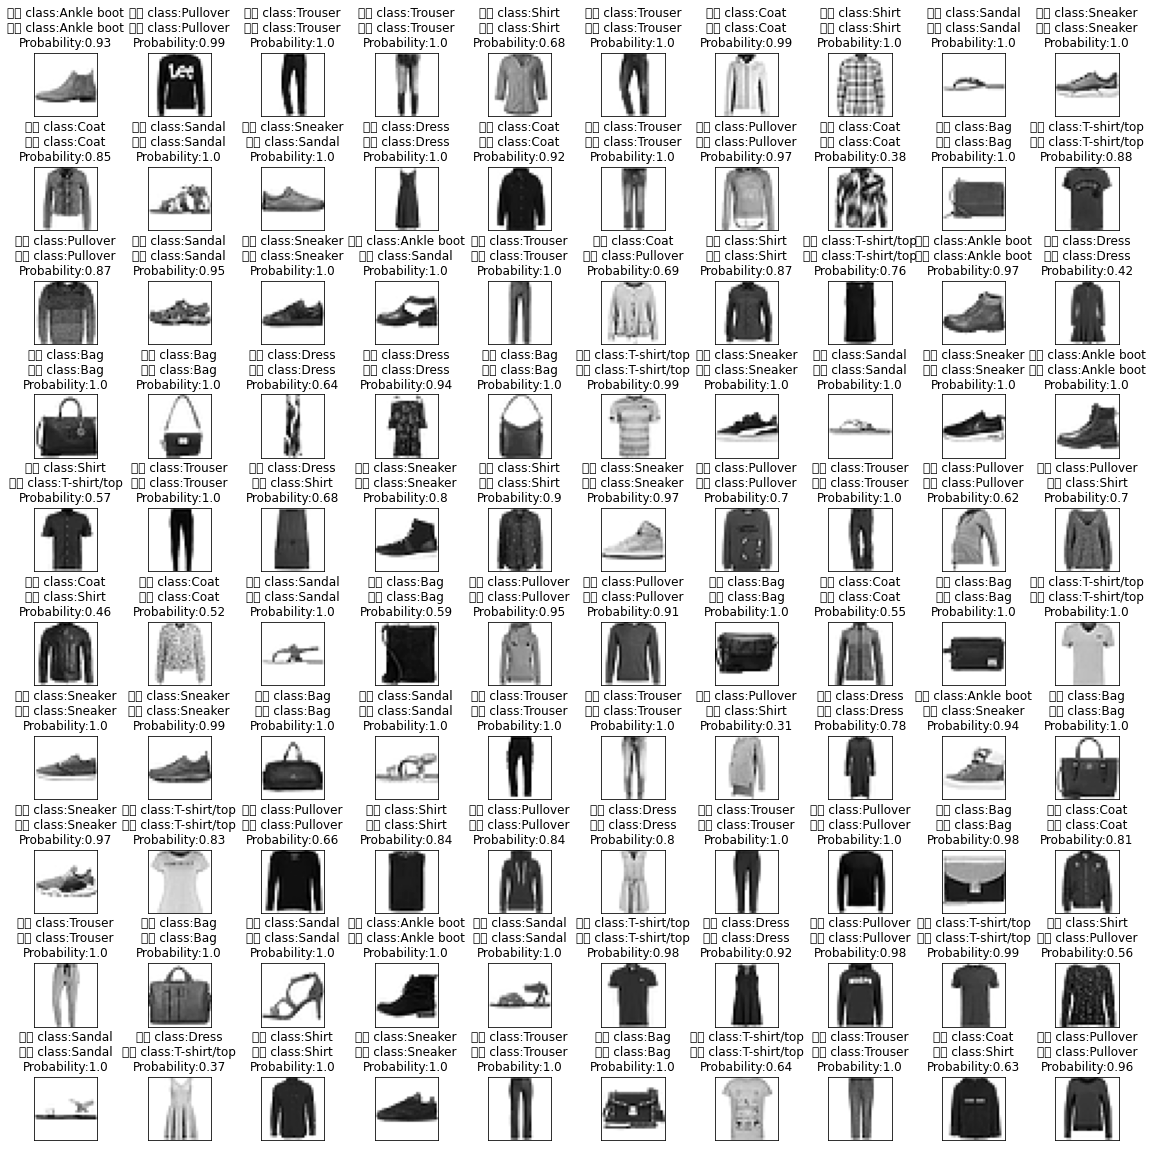

In [49]:
# 테스트 셋으로 시험해보기
# 100개 씩 샘플링하여 저장
for_visualization_test_x = test_dataset.data.numpy()[:100] 
for_visualization_test_y = test_dataset.targets.numpy()[:100]
f,axs = plt.subplots(10,10,figsize = (20,20))
plt.subplots_adjust(hspace = 0.8)  # 그래프간의 간격 사이즈

for i in range(10):
  for j in range(10):

    x_data = for_visualization_test_x[10*i+j]
    y_data = for_visualization_test_y[10*i+j]
    real_class = dataset.classes[y_data]
    predicted_class = dataset.classes[np.argmax(model.predict_proba(x_data.reshape(1,-1)))] 
    predicted_prob = np.max(model.predict_proba(x_data.reshape(1,-1))).round(2) # 어떤 확률값이 가장 높은지 출력.

    # x,y 축의 지점 표시를 안함
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])

    # subplot의 제목을 i번째 결과에 해당하는 숫자로 설정
    axs[i,j].set_title(f"실제 class:{real_class}\n예측 class:{predicted_class}\nProbability:{predicted_prob}")

    # 입력으로 사용한 i번째 테스트 이미지를 28*28로 재배열하고
    # 이 2차원 배열을 그레이스케일 이미지로 출력
    axs[i,j].imshow(x_data.reshape((28,28)),cmap=plt.cm.gray_r)

plt.show()